# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [87]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
data = data.drop(columns=['dropoff_datetime'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [ ]:
sns.histplot(data=data, x = 'trip_duration')

<Axes: xlabel='trip_duration', ylabel='Count'>

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В основном все оценки которокие относительно огромных выбросов, поэтому гистограмма выглядит не очень показательно, возможно, стоит использовать логарифмическую шкалу по оси x

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Как уже было сказано выше разброс значений очень велик: похоже, что были поездки длившиеся более нескольких суток, а в среднем они около 10-20 минут. Поэтому для эффективного сравнения чисел с большим разбросом стоит логарифмировать данные, чтобы сравнивать порядки

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat y - \hat a(x_i)\big)^2} = MSE(X, \hat y, \hat a)$$
Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [6]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])

<Axes: xlabel='log_trip_duration', ylabel='Count'>

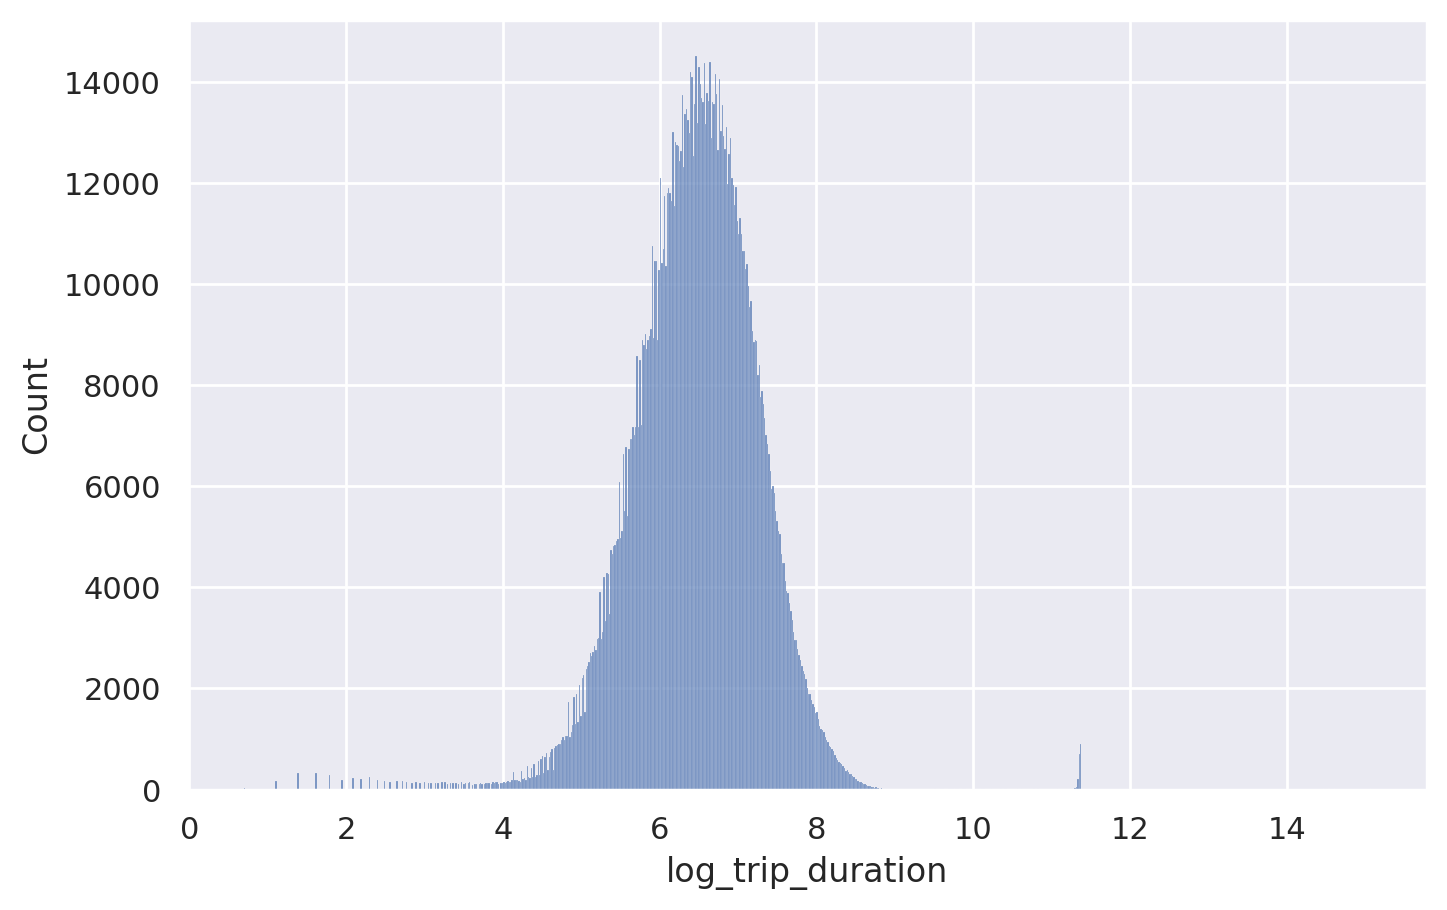

In [ ]:
sns.histplot(data=data, x='log_trip_duration')

In [7]:
data = data.drop(columns=['trip_duration'])

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [8]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.sum((log1p_y_true - log1p_y_pred)**2)/log1p_y_true.size)

rmsle_best_const = rmsle(data.log_trip_duration, np.mean(data.log_trip_duration))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [9]:
def get_date(row):
  return row.pickup_datetime.date()

data['date'] = data.apply(get_date, axis=1)

<Axes: xlabel='count', ylabel='date'>

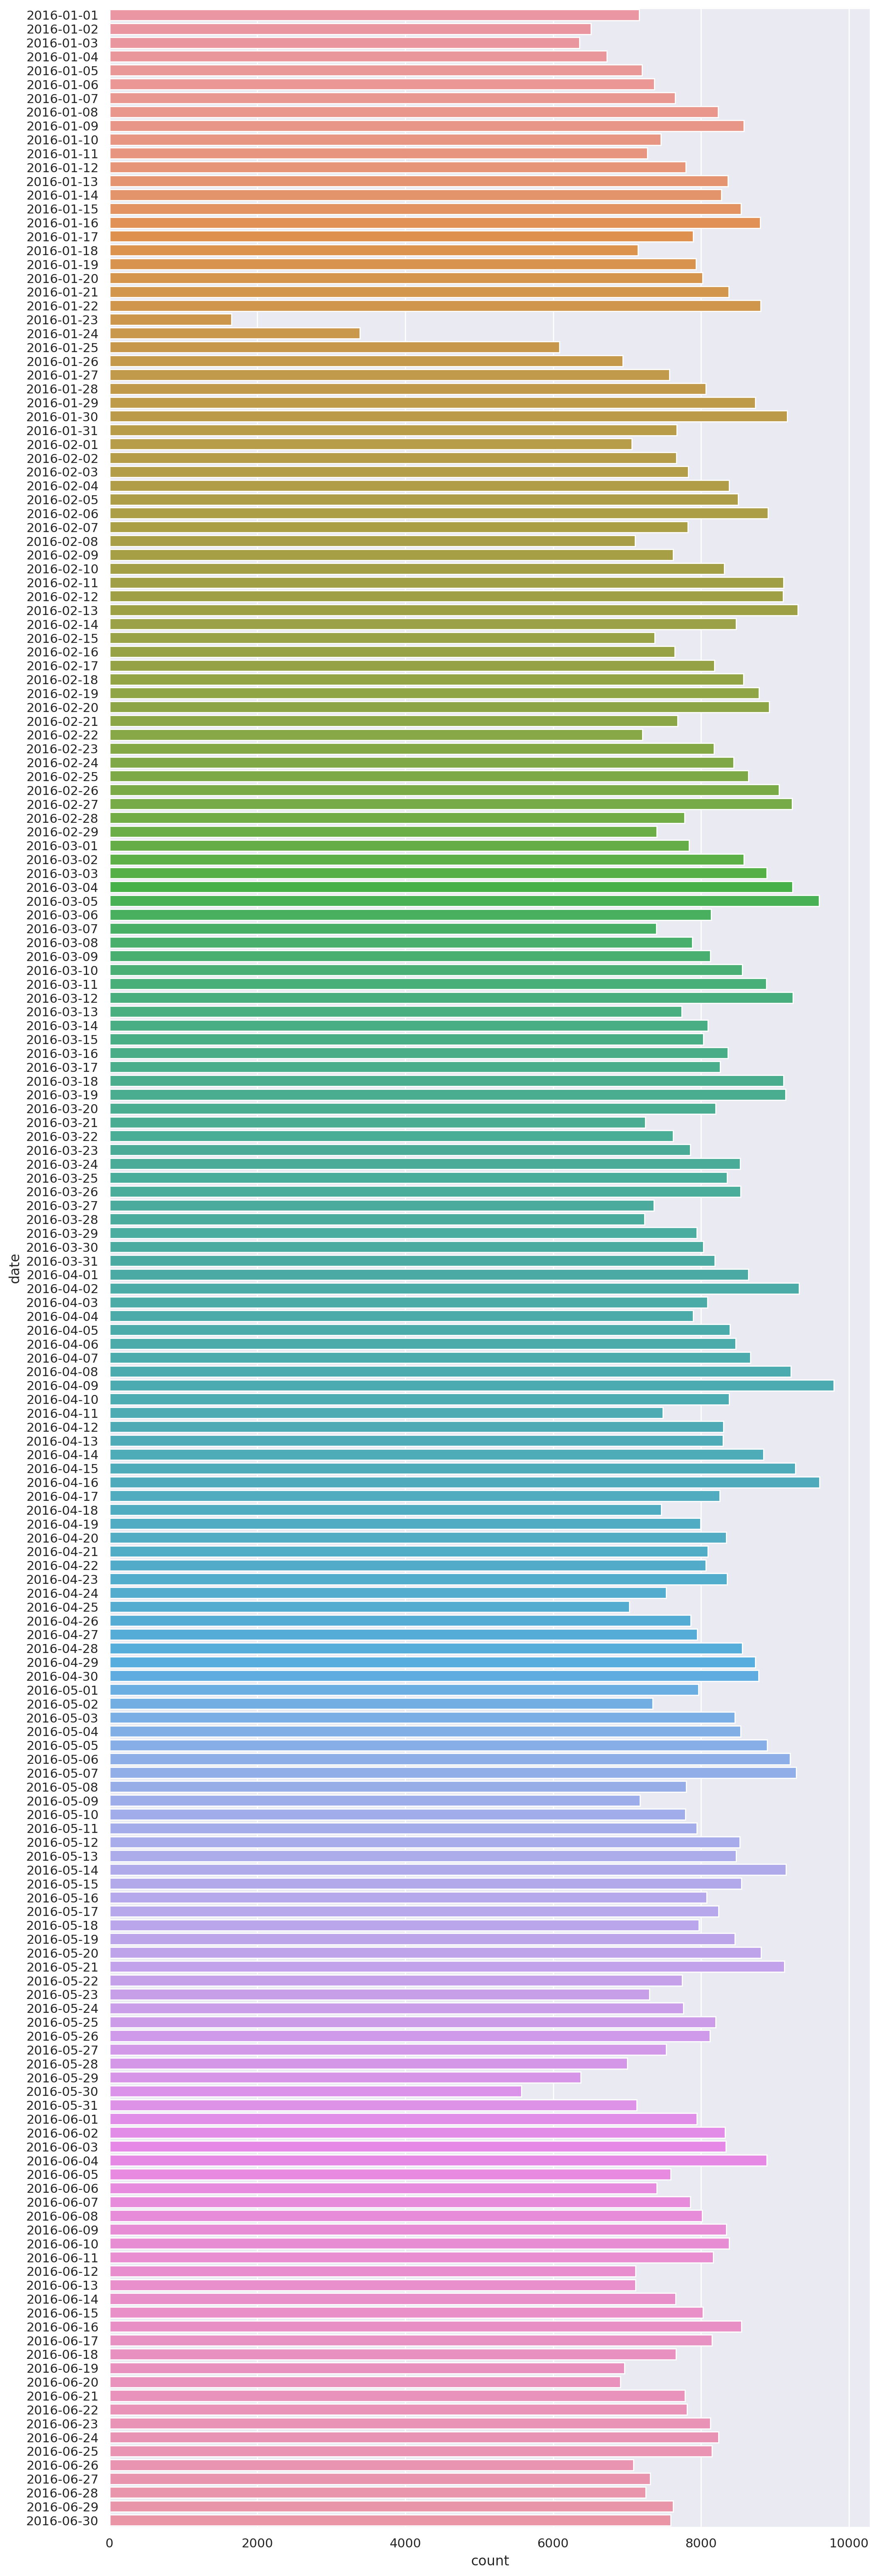

In [ ]:
plt.figure(figsize=(12, 40))
s = data.sort_values(by=['date'])
sns.countplot(data=s, y='date')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

23 января: Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури (РИА Новости)

29 мая: Сбой компьютера в аэропорту Нью-Йорка привел к образованию огромных очередей (видимо это повлияло на количество поездок в такси)

In [10]:
def get_weekday(row):
  return row.pickup_datetime.weekday() + 1

def get_hour(row):
  return row.pickup_datetime.hour

data['weekday'] = data.apply(get_weekday, axis=1)
data['hour'] = data.apply(get_hour, axis=1)


In [ ]:
cur_data = data.groupby(by=['weekday', 'hour']).agg(cnt=('id', 'count')).reset_index()

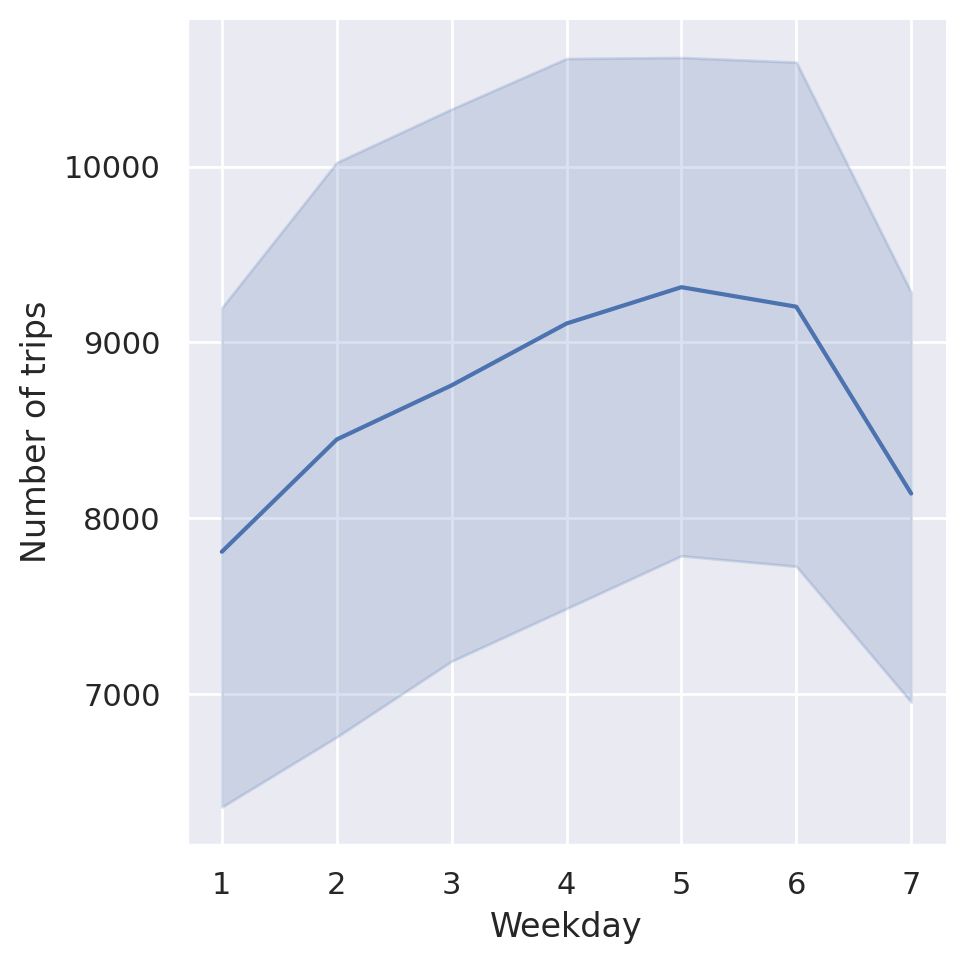

In [ ]:
sns.relplot(data=cur_data, x='weekday', kind='line',y='cnt').set_axis_labels("Weekday", "Number of trips")

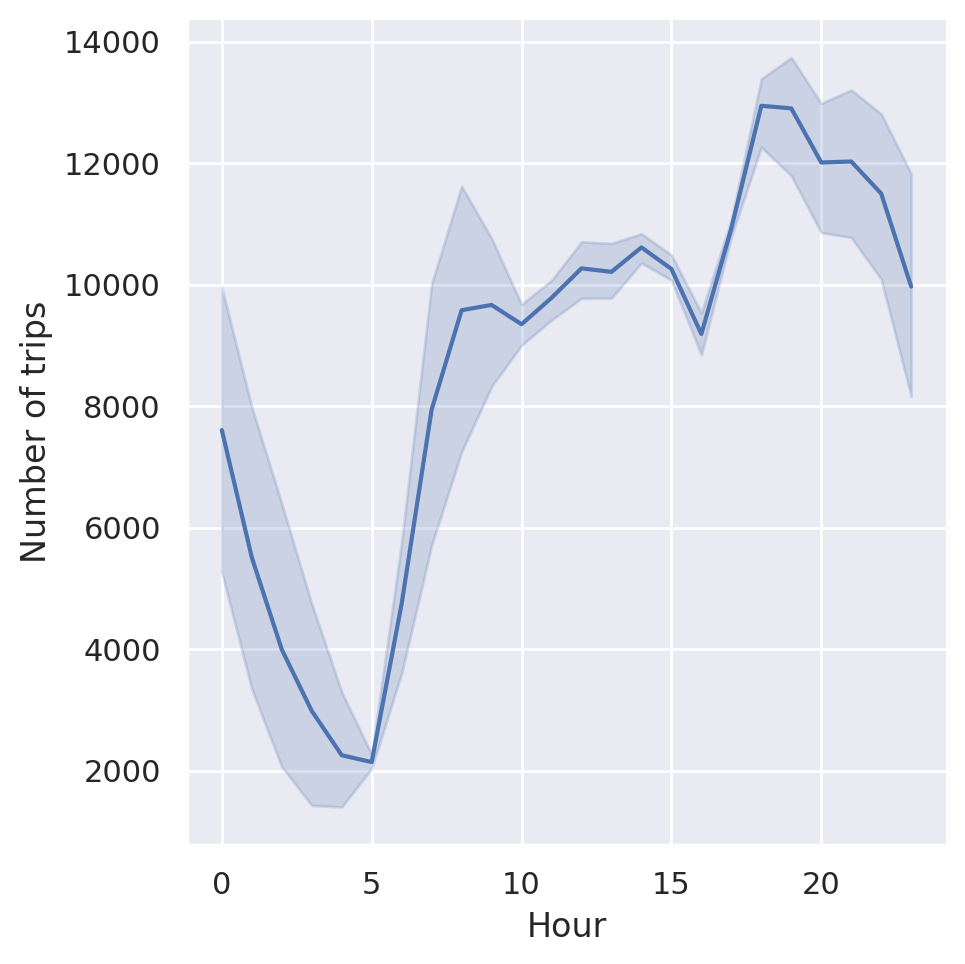

In [ ]:
sns.relplot(data=cur_data, x='hour', kind='line',y='cnt').set_axis_labels("Hour", "Number of trips")


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [11]:
def get_month(row):
  return row.pickup_datetime.month

data['month'] = data.apply(get_month, axis=1)

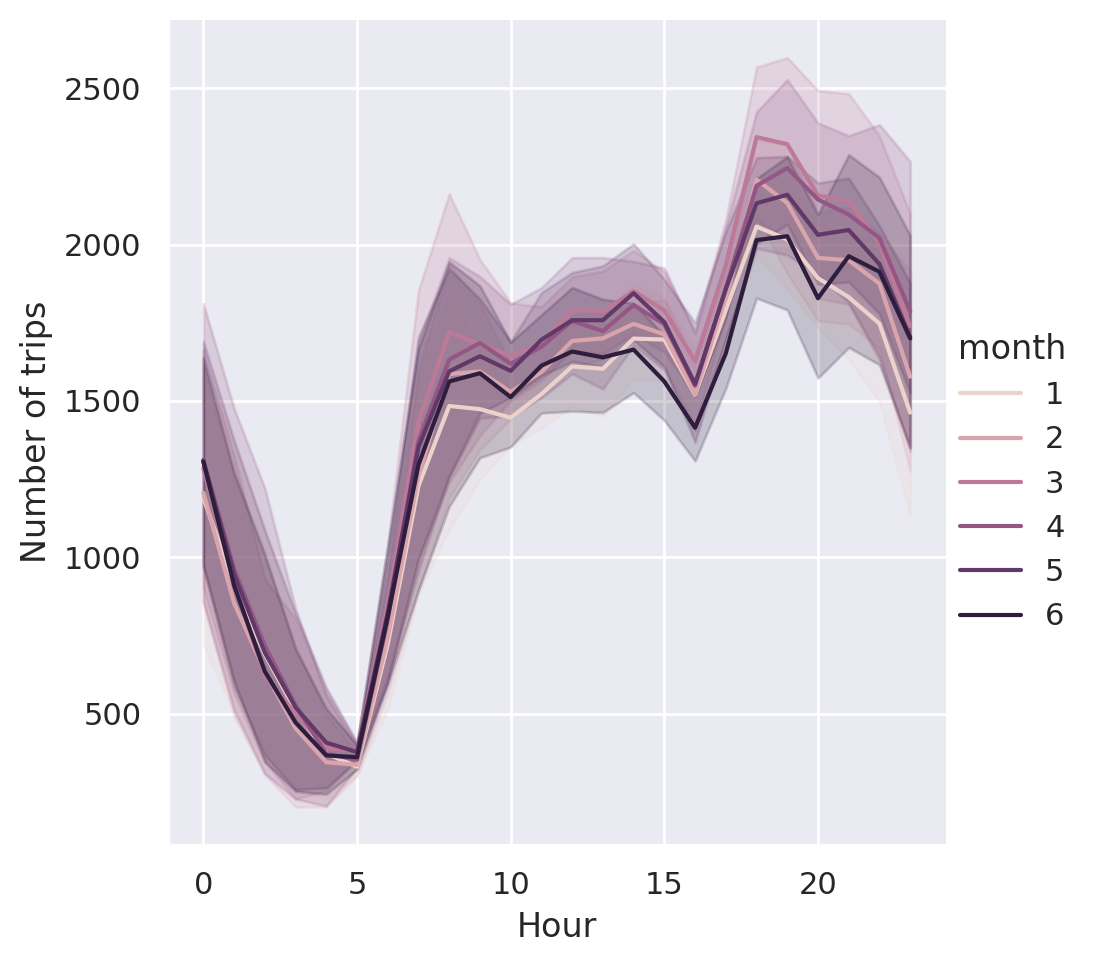

In [ ]:
cur_data = data.groupby(by=['month', 'hour', 'weekday']).agg(cnt=('id', 'count')).reset_index()
sns.relplot(data=cur_data, x='hour', kind='line', y='cnt', hue='month').set_axis_labels("Hour", "Number of trips")

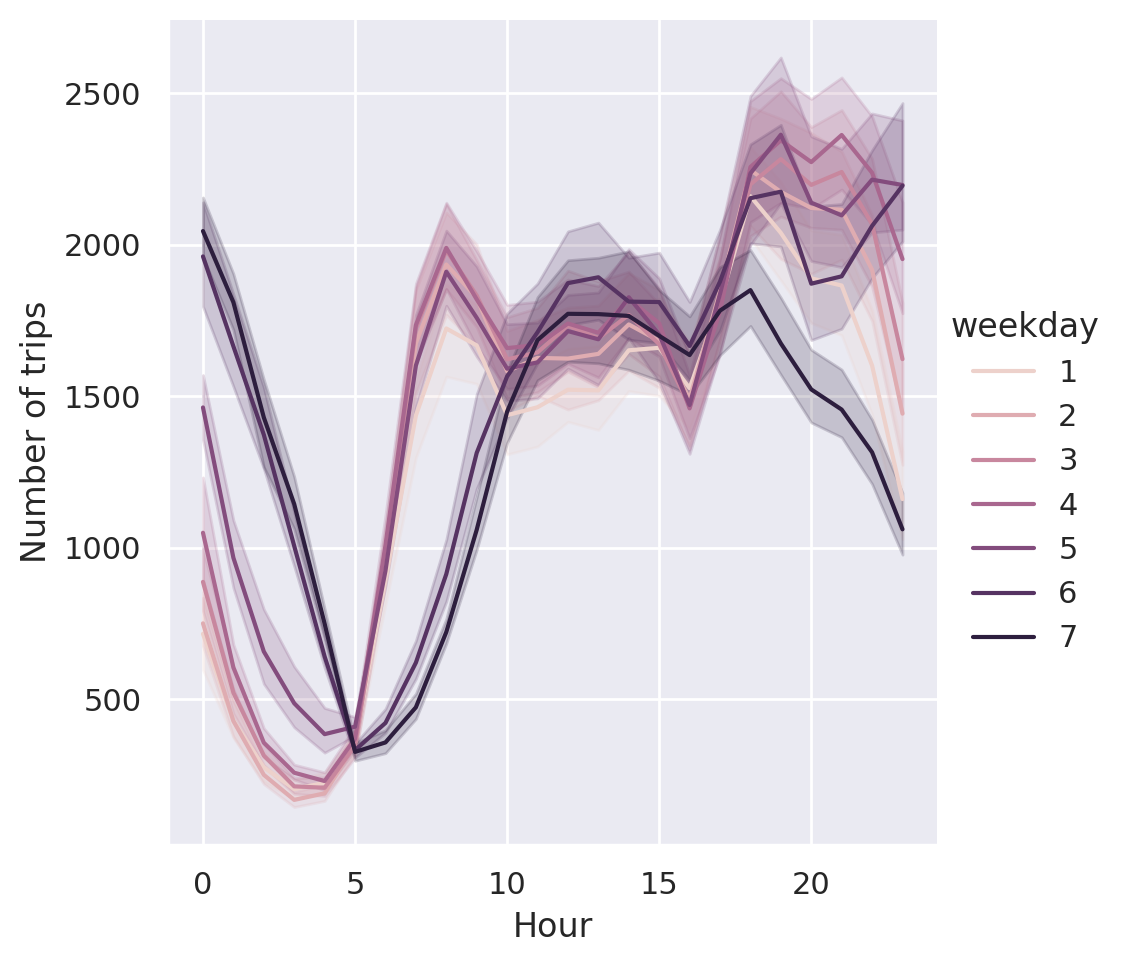

In [ ]:
sns.relplot(data=cur_data, x='hour', kind='line', y='cnt', hue='weekday').set_axis_labels("Hour", "Number of trips")

В выходные дни (6-7) заметно больше поездок ночью и меньше поездок по утрам, что можно связать с тем, что людям не надо на работу, а также что жители ходят в бары и клубы, употребляют алкоголь и не могут пользоваться собственным автомобилем, с утра соответсвенно спят, потому что не надо на работу. Также стоит отменить, что наименее активное время во все дни всё таки ночь, что тоже довольно предсказуемо, месяцы распеределены похоже друг на друга, сложно сделать какие-то выводы

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [12]:
from sklearn.model_selection import train_test_split

y = data.log_trip_duration

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [ ]:
average_per_weekdays = X_train.groupby('weekday').agg(average_log_trip_duration=('log_trip_duration', 'mean')).reset_index()
sns.lineplot(data=average_per_weekdays, x='weekday', y='average_log_trip_duration')

In [ ]:
average_per_weekdays = X_train.groupby('hour').agg(average_log_trip_duration=('log_trip_duration', 'mean')).reset_index()
sns.lineplot(data=average_per_weekdays, x='hour', y='average_log_trip_duration')

In [ ]:
plt.figure(figsize=(30, 5))
average_per_weekdays = X_train.groupby('date').agg(average_log_trip_duration=('log_trip_duration', 'mean')).reset_index()
sns.lineplot(data=average_per_weekdays, x='date', y='average_log_trip_duration')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Зависимость таргета от часа очень похоже на свой аналог, зависимость от дня недели меньше похоже, но тоже напоминает. Могу предположить, что активность на дорогах связана с длиной поездки: чем больше желающих куда-то поехать (утром, днемБ вечером), тем больше поездок в такси, но также и дольше ехать (загружены дороги, пробки). Ночью ситуация обратная, дороги пустые, но и поездок мало. С днями недели та же логика. В первый аномальный период скачок длины поездки, так как из-за снегопада вероятно были огромные пробки, в конце мая (второй скачок) в принципе ничего необычного. График похож на периодический, предположу, что период у него равен неделе, соответственно максимумы это будние дни, минимумы выходные

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [13]:
def calculate_number_of_day(row):
  return int(row.pickup_datetime.strftime("%j"))

def is_unusual(row):
  return (22 < row.day_number and row.day_number < 27 or 148 < row.day_number and row.day_number < 15)

data['day_number'] = data.apply(calculate_number_of_day, axis=1)
data['is_unusual'] = data.apply(is_unusual, axis=1)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Разумеется признак аномальности является категориальным, так как он принимает всего два значения да/нет. А также день недели категориальный, так как числа отвечающие за этот показатель не несут в себе смысла, они лишь порядковый номер дня недели. По той же логике можно понять, что и все остальные наши признаки подходят под категориальное описание скорее

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [15]:
categorical = ['weekday', 'hour', 'month','day_number', 'is_unusual']
column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)])

pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
model = pipeline.fit(X_train[categorical], y_train)
y_test_pred = model.predict(X_test[categorical])
print("Test RMSLE = %.4f" % rmsle(y_test, y_test_pred))

Test RMSLE = 0.7871


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Два аэропорта выделяются, ведь там действительно много такси, а также чтобы выехать оттуда зачастую приходиться пробиваться сквозь пробки что тоже отразится на длительности поездки

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [15]:
!pip install haversine

In [16]:
from haversine import haversine, Unit
from math import radians

def calculate_haversine(row):
  pickup_radians = (row.pickup_latitude, row.pickup_longitude)
  dropoff_radians = (row.dropoff_latitude, row.dropoff_longitude)
  return haversine(pickup_radians, dropoff_radians)

data['haversine'] = data.apply(calculate_haversine, axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [17]:
data['log_haversine'] = np.log1p(data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
new_data = pd.read_csv('train.csv')
new_data = X_train.merge(new_data.merge(data,  on='id'), on='id')

new_data['average_speed'] = (new_data.haversine / new_data.trip_duration) * 3600

<Axes: ylabel='Count'>

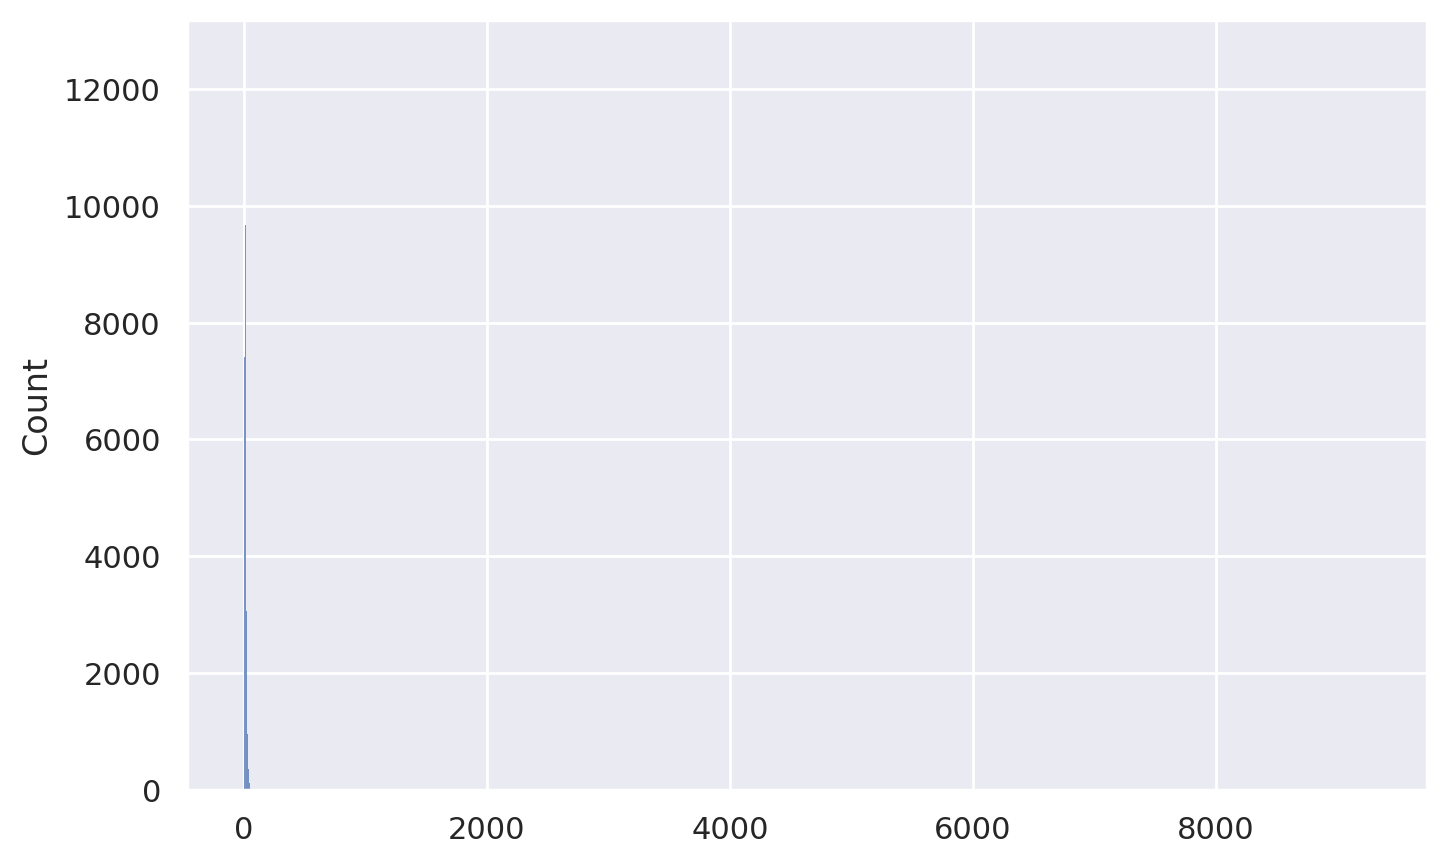

In [ ]:
sns.histplot(data=new_data.average_speed)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: xlabel='average_speed', ylabel='Count'>

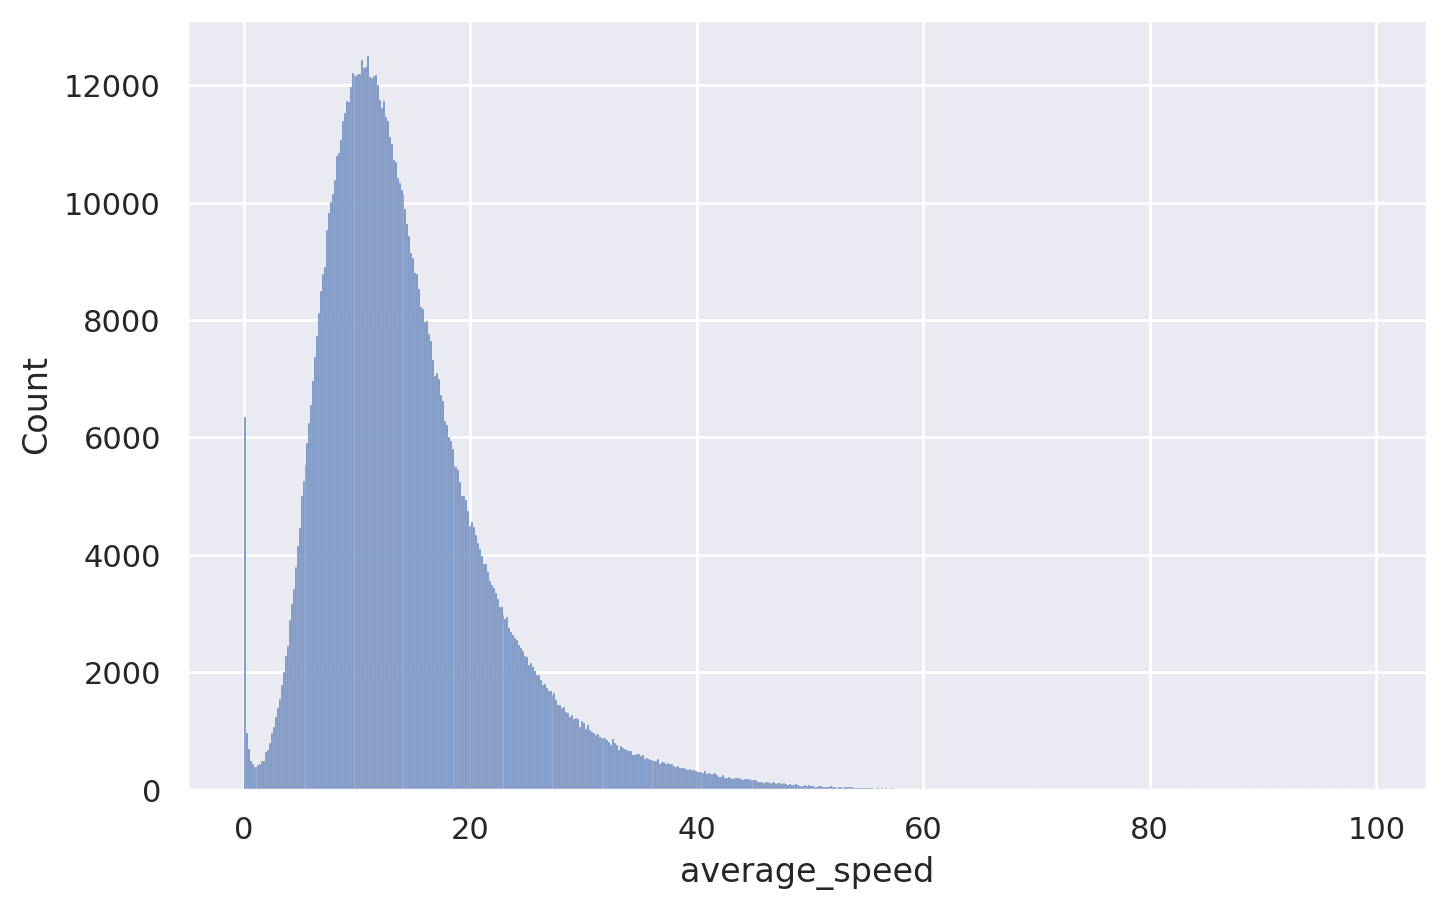

In [ ]:
sns.histplot(data=new_data[new_data.average_speed < 100].average_speed)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-43-514a4745d071>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(new_data.groupby(by=['weekday_x', 'hour_x']).agg(median_speed=('average_speed', 'median')).reset_index().pivot('weekday_x', 'hour_x', 'median_speed')).set(xlabel= 'Hour', ylabel='Weekday')


[Text(0.5, 21.249999999999993, 'Hour'), Text(66.25, 0.5, 'Weekday')]

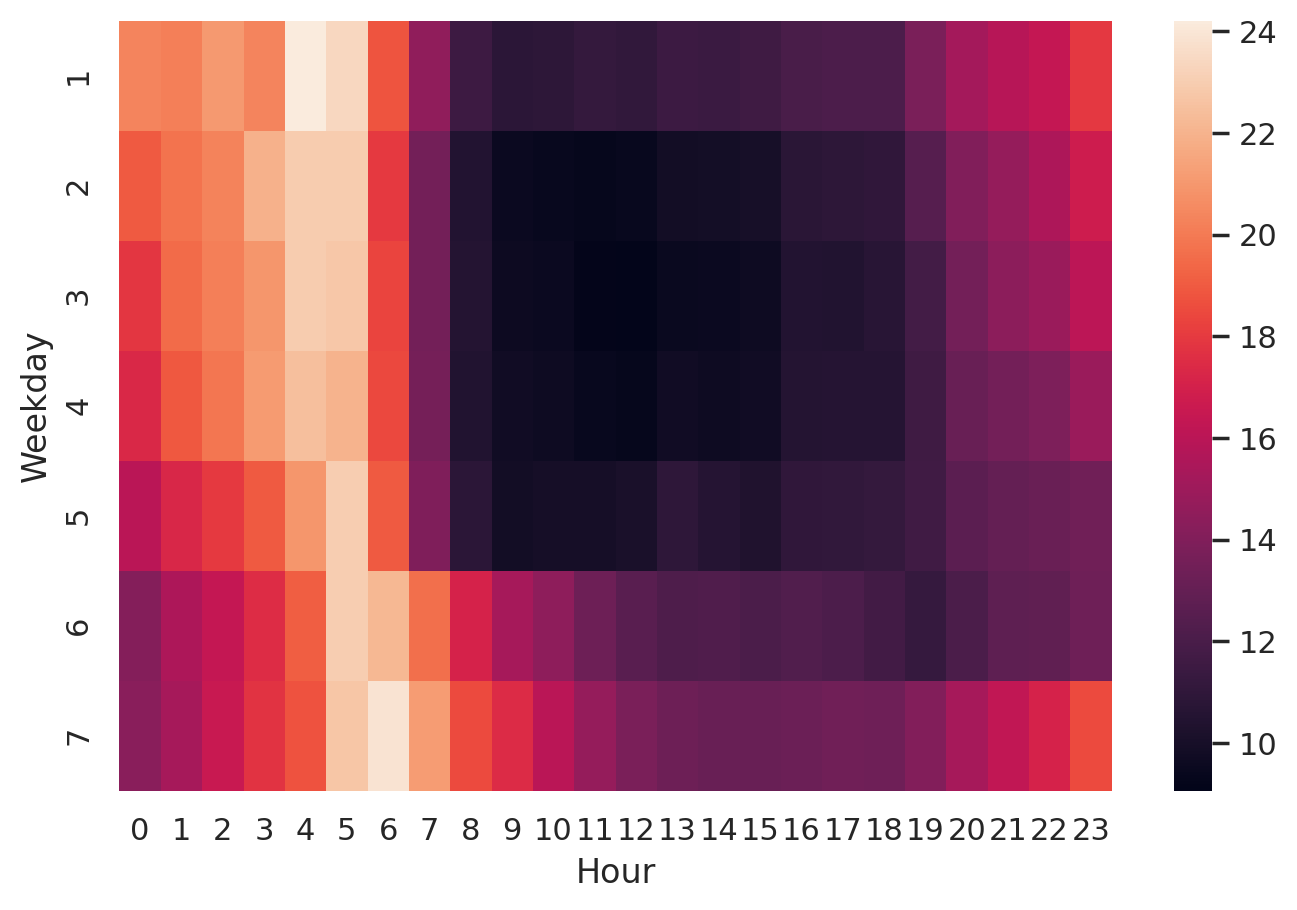

In [ ]:
sns.heatmap(new_data.groupby(by=['weekday_x', 'hour_x']).agg(median_speed=('average_speed', 'median')).reset_index().pivot('weekday_x', 'hour_x', 'median_speed')).set(xlabel= 'Hour', ylabel='Weekday')

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что у нас есть признак - расстояние, а если будет еще и скорость, значит можно восстановить значение времени по формуле и никакое машинное обучение не нужно

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Минимальная скорость наблюдается в будние дни в рабочие часы, потому что траффик оставляет желать лучшего в это время, а ночью напротив скорость максимальна по причине отсутствия большого количества машин

In [18]:
data['is_worst_time'] = 0
data.loc[((7 < data['hour']) & (data['hour'] < 19) & (data['weekday'] < 6)), 'is_worst_time'] = 1
data['is_best_time'] = 0
data.loc[((2 < data['hour']) & (data['hour'] < 7) & (data['weekday'] < 6) | (4 < data['hour']) & (data['hour'] < 8) & (data['weekday'] > 5)), 'is_best_time'] = 1
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration        date  \
0               40.765602                  N           6.122493  2016-03-14   
1               40.731152                  N           6.498282  2016-06-12   
2               40.710087                  N           7.661527  2016-01-19   
3               40.706718                  N           6.063785  2016-04-06   
4               40.782520                  N           6.077642  2016-03-26   
...                   ...                ...                ...         ...   
1458639         40.740170                  N           6.658011  2016-04-08   
1458640         40.796547                  N           6.486161  2016-01-10   
1458641         40.707371                  N           6.639876  2016-04-22   
1458642         40.757107                  N           5.924256  2016-01-05   
1458643         40.790585                  N           5.293305  2016-04-05   

         weekday  hour  month  day_number  is_unusual  haversine  \
0              1    17      3          74       False   1.498523   
1              7     0      6         164       False   1.805510   
2              2    11      1          19       False   6.385107   
3              3    19      4          97       False   1.485500   
4              6    13      3          86       False   1.188590   
...          ...   ...    ...         ...         ...        ...   
1458639        5    13      4          99       False   1.225082   
1458640        7     7      1          10       False   6.049844   
1458641        5     6      4         113       False   7.824617   
1458642        2    15      1           5       False   1.092565   
1458643        2    14      4          96       False   1.134044   

         log_haversine  is_worst_time  is_best_time  
0             0.915700              1             0  
1             1.031585              0             0  
2             1.999465              1             0  
3             0.910474              0             0  
4             0.783258              0             0  
...                ...            ...           ...  
1458639       0.799794              1             0  
1458640       1.953005              0             1  
1458641       2.177545              0             1  
1458642       0.738391              1             0  
1458643       0.758019            

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Потому что в аэропорту пробки на въезде/выезде, время оплаты парковки забирает время, а также выгрузка и погрузка багажа

In [19]:
jfk_coors = (40.633333, -73.783333, )
lagurdia_coors = (40.77722700, -73.87258500)

def started_in_jfk_airport(row):
  pickup_coors = (row.pickup_latitude, row.pickup_longitude)
  distance = haversine(pickup_coors, jfk_coors)
  return int(distance < 2.0)

def ended_in_jfk_airport(row):
  dropoff_coors = (row.dropoff_latitude, row.dropoff_longitude)
  distance = haversine(dropoff_coors, jfk_coors)
  return int(distance < 2.0)

def started_in_lagur_airport(row):
  pickup_coors = (row.pickup_latitude, row.pickup_longitude)
  distance = haversine(pickup_coors, lagurdia_coors)
  return int(distance < 2.0)

def ended_in_lagur_airport(row):
  dropoff_coors = (row.dropoff_latitude, row.dropoff_longitude)
  distance = haversine(dropoff_coors, lagurdia_coors)
  return int(distance < 2.0)

data['started_in_jfk'] = data.apply(started_in_jfk_airport, axis=1)
data['ended_in_jfk'] = data.apply(ended_in_jfk_airport, axis=1)
data['started_in_lagur'] = data.apply(started_in_lagur_airport, axis=1)
data['ended_in_lagur'] = data.apply(ended_in_lagur_airport, axis=1)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='started_in_jfk', ylabel='log_trip_duration'>

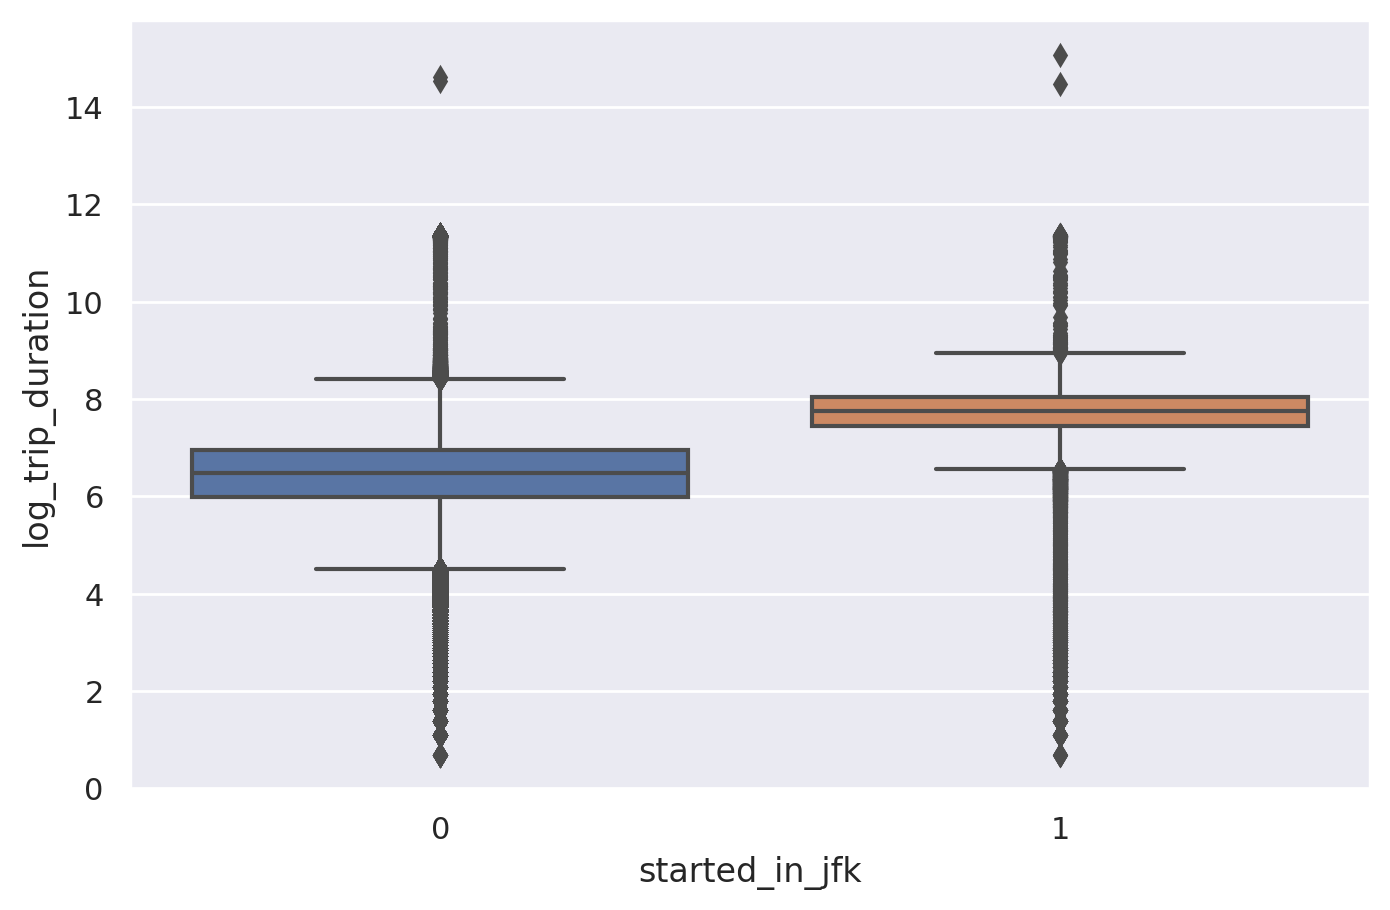

In [ ]:
sns.boxplot(data=data, x='started_in_jfk', y='log_trip_duration')

<Axes: xlabel='ended_in_jfk', ylabel='log_trip_duration'>

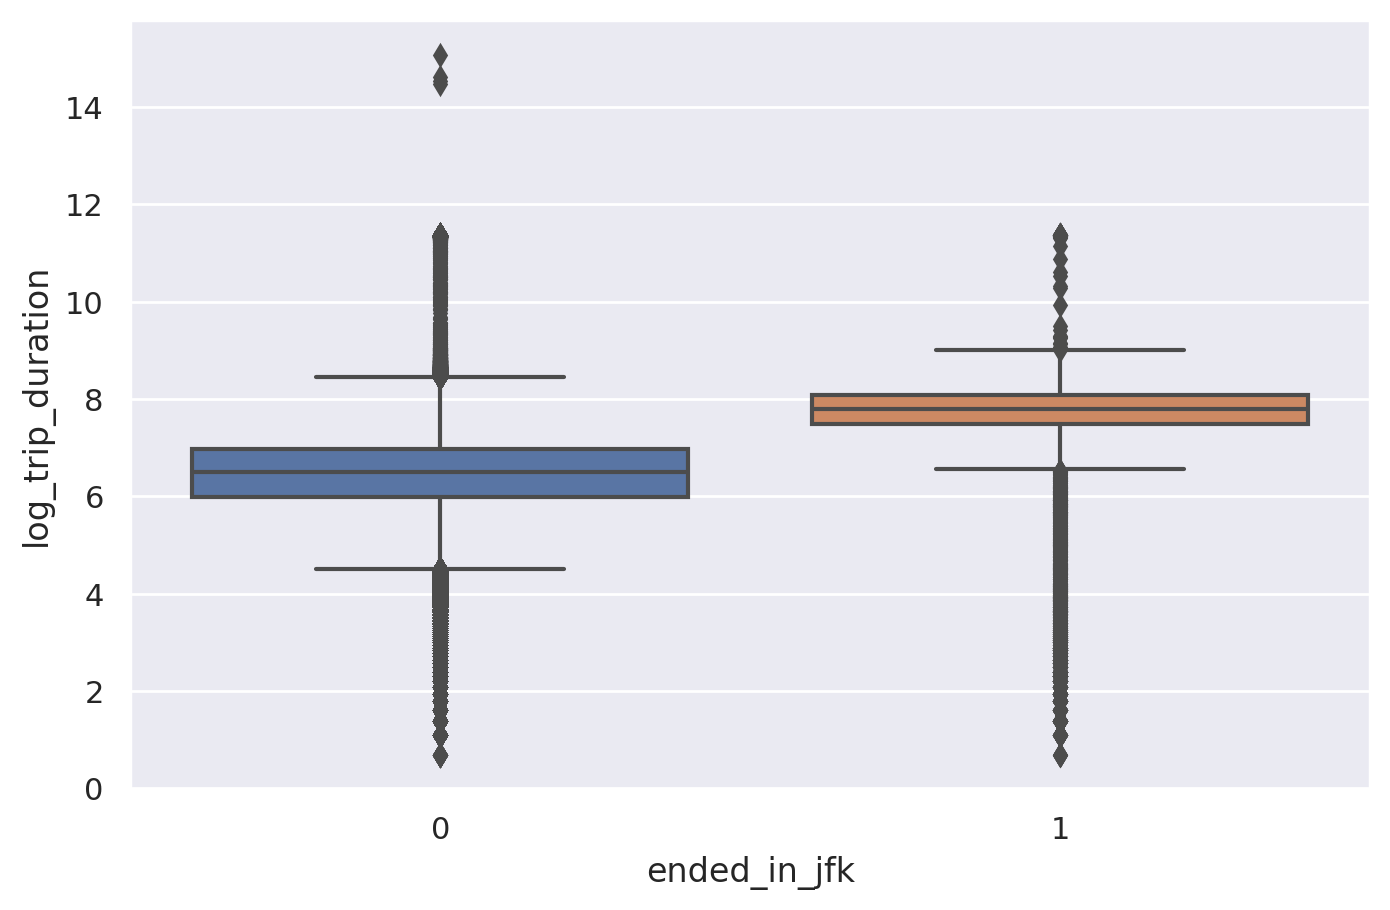

In [ ]:
sns.boxplot(data=data, x='ended_in_jfk', y='log_trip_duration')

<Axes: xlabel='started_in_lagur', ylabel='log_trip_duration'>

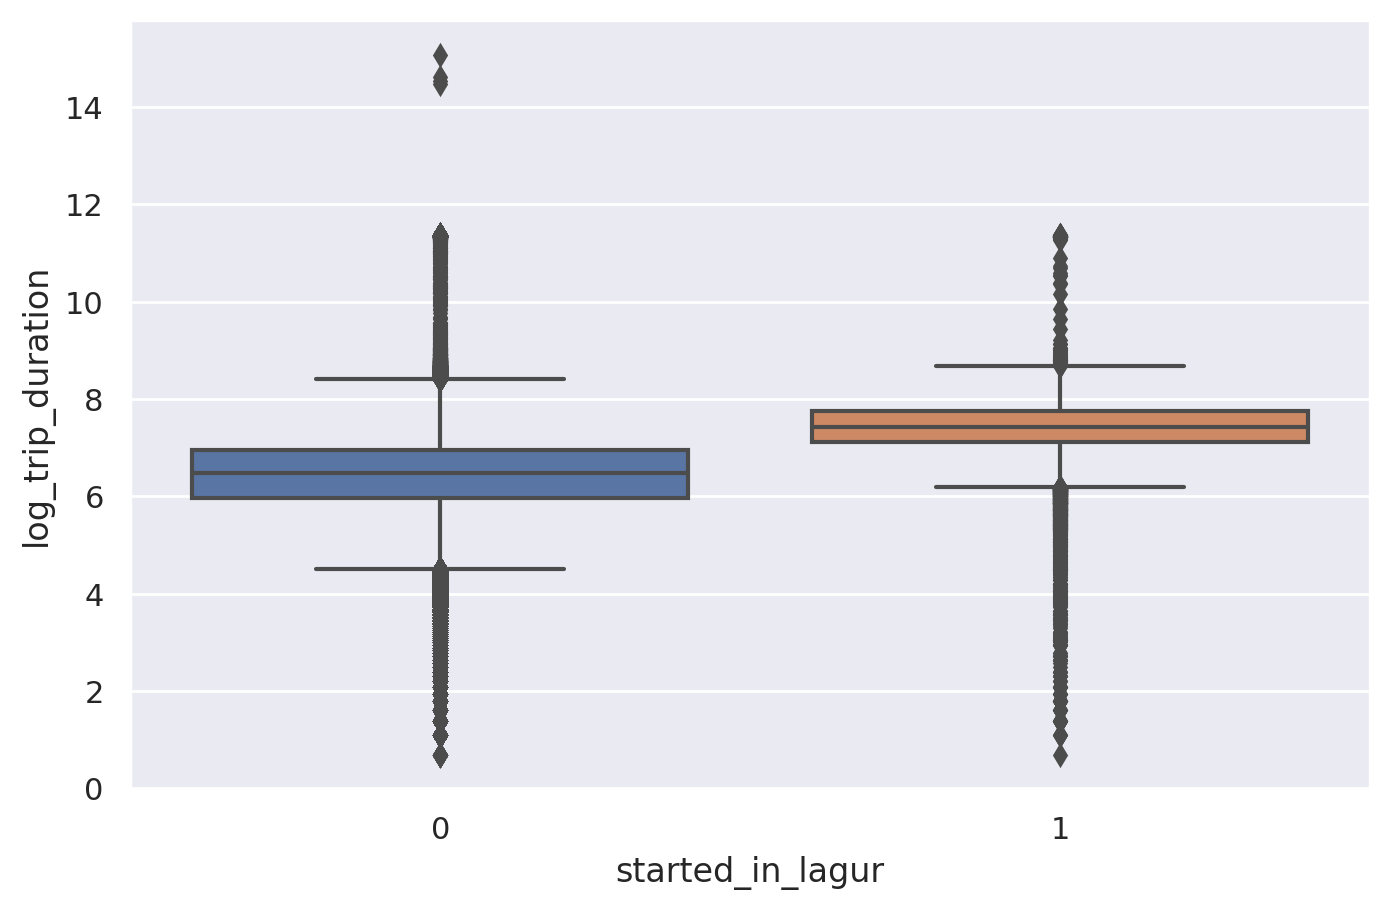

In [ ]:
sns.boxplot(data=data, x='started_in_lagur', y='log_trip_duration')

<Axes: xlabel='ended_in_lagur', ylabel='log_trip_duration'>

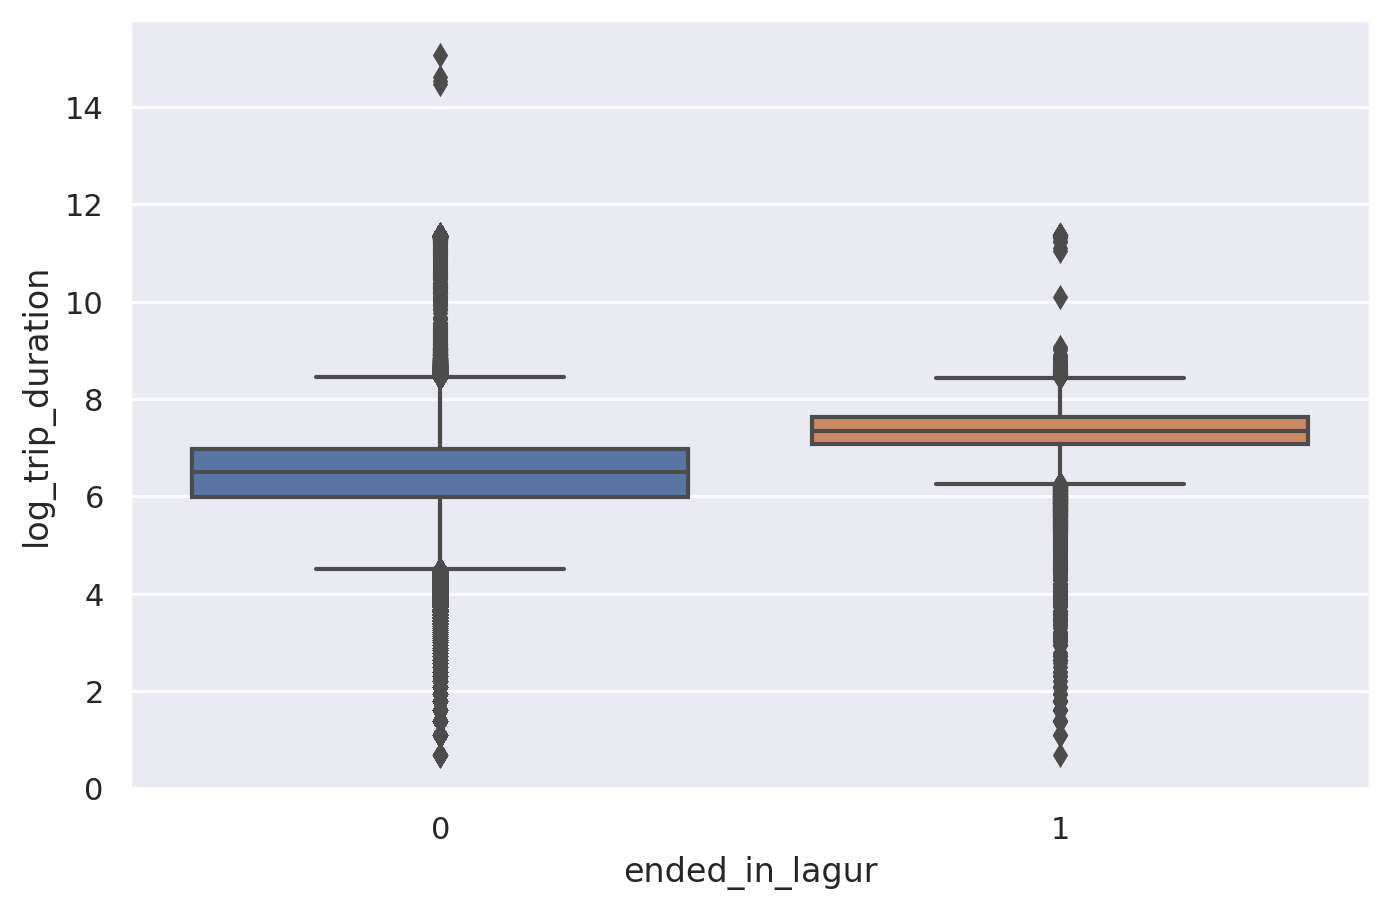

In [ ]:
sns.boxplot(data=data, x='ended_in_lagur', y='log_trip_duration')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Видно, что на всех графиках среднее время поездки отличается потчи в e раз, это можно объяснить тем, что аэропорт находится далеко, но также и по вышеперечисленным причинам, так что признак хороший

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n, m):
        self.north_west = (40.80973054123304, -74.02845239639902)
        self.north_east = (40.80973054123304, -73.95596895554517)
        self.south_west = (40.711081379860886, -74.02845239639902)
        self.south_east = (40.711081379860886, -73.95596895554517)
        self.rows = n
        self.columns = m
        self.delta_lati = (self.north_west[0] - self.south_west[0]) / self.rows
        self.delta_long = (self.north_east[1] - self.north_west[1]) / self.columns

    def show_map(self, data):
        location = (data['pickup_latitude'].mean(), data['pickup_longitude'].mean())
        m = folium.Map(location=location)

        folium.Rectangle([self.north_west, self.south_east],).add_to(m)

        for point in self.cells:
            folium.Rectangle([point[0], point[1]]).add_to(m)

        display(m)

    def fit(self, X=None, y=None):
        self.cells = np.zeros((self.rows * self.columns, 2, 2))
        for i in range(self.rows):
          for j in range(self.columns):
            self.cells[i*self.columns+j][0][0] = self.south_west[0] + self.delta_lati * i
            self.cells[i*self.columns+j][0][1] = self.south_west[1] + self.delta_long * j
            self.cells[i*self.columns+j][1][0] = self.cells[i*self.columns+j][0][0] + self.delta_lati
            self.cells[i*self.columns+j][1][1] = self.cells[i*self.columns+j][0][1] + self.delta_long



    def transform(self, X, y=None):
        df = X.copy()
        df.loc[:, 'pickup_cell'] = -1
        df.loc[:, 'dropoff_cell'] = -1
        for i in range(self.rows):
          for j in range(self.columns):
            df.loc[((np.floor((df.pickup_longitude - self.south_west[1]) / self.delta_long) == j) & (np.floor((df.pickup_latitude - self.south_west[0]) / self.delta_lati) == i)), 'pickup_cell'] = i * self.columns + j
            df.loc[((np.floor((df.dropoff_longitude - self.south_west[1]) / self.delta_long) == j) & (np.floor((df.dropoff_latitude - self.south_west[0]) / self.delta_lati) == i)), 'dropoff_cell'] = i * self.columns + j
        return df

In [24]:
tr = MapGridTransformer(3, 4)
tr.fit()
data = tr.transform(data)
tr.show_map(data)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
categorical = ['weekday', 'hour', 'month','day_number', 'is_unusual', 'pickup_cell', 'dropoff_cell', 'started_in_jfk', 'ended_in_jfk', 'started_in_lagur', 'ended_in_lagur', 'is_worst_time', 'is_best_time']
numeric = ['log_haversine']
column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
 ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
model = pipeline.fit(X_train[categorical+numeric], y_train)
y_test_pred = model.predict(X_test[categorical+numeric])
print("Test RMSLE = %.4f" % rmsle(y_test, y_test_pred))

Test RMSLE = 0.4725


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [24]:
print('Unique vendor: ', data.vendor_id.nunique())
print('Unique passenger_count: ', data.passenger_count.nunique())
print('Unique store_and_fwd_flag: ', data.store_and_fwd_flag.nunique())

Unique vendor:  2
Unique passenger_count:  10
Unique store_and_fwd_flag:  2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='vendor_id', ylabel='log_trip_duration'>

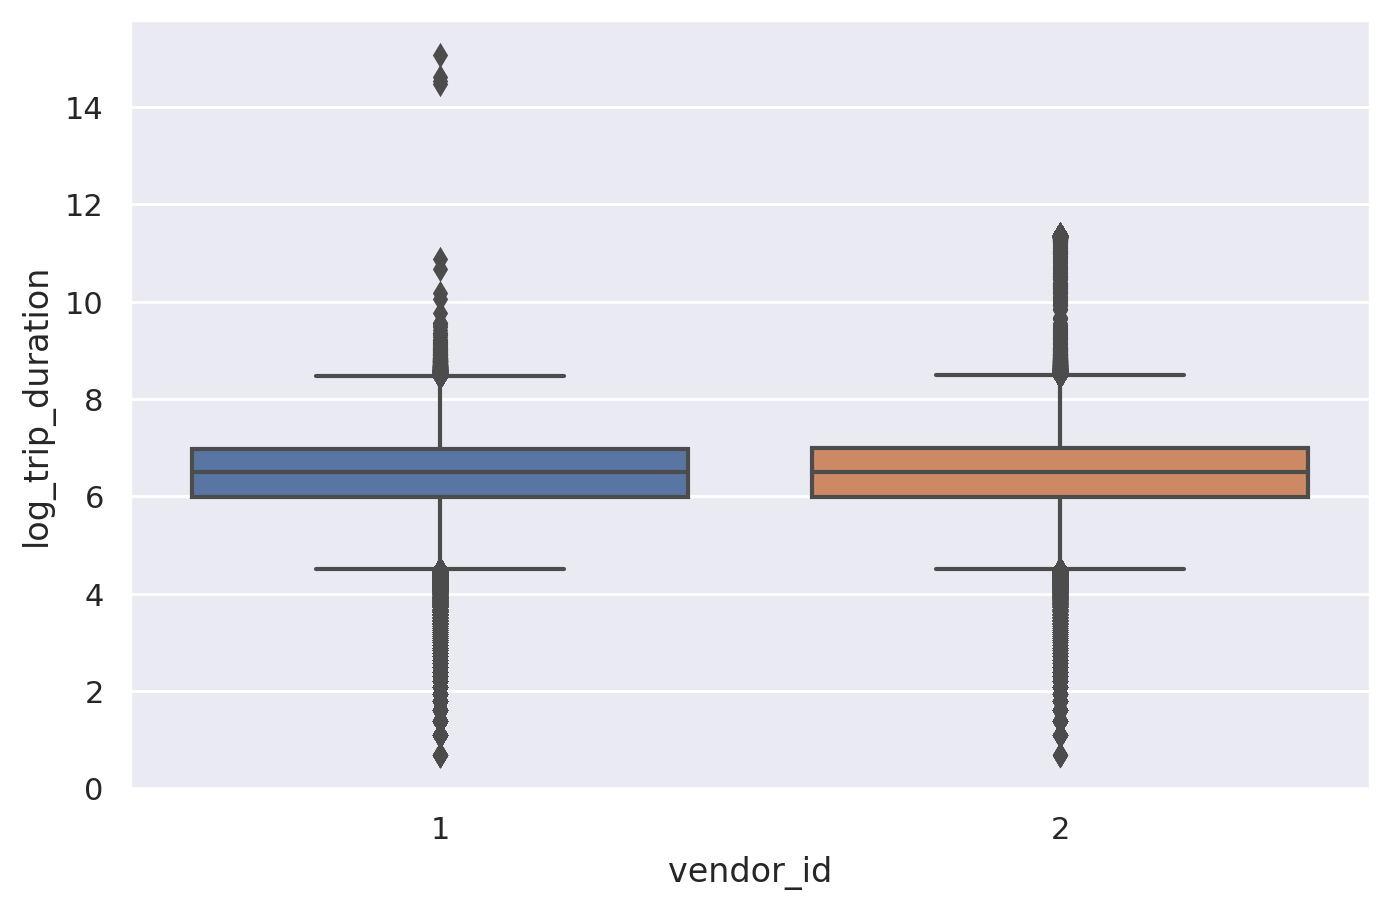

In [ ]:
sns.boxplot(data=data, x='vendor_id', y='log_trip_duration')

<Axes: xlabel='passenger_count', ylabel='log_trip_duration'>

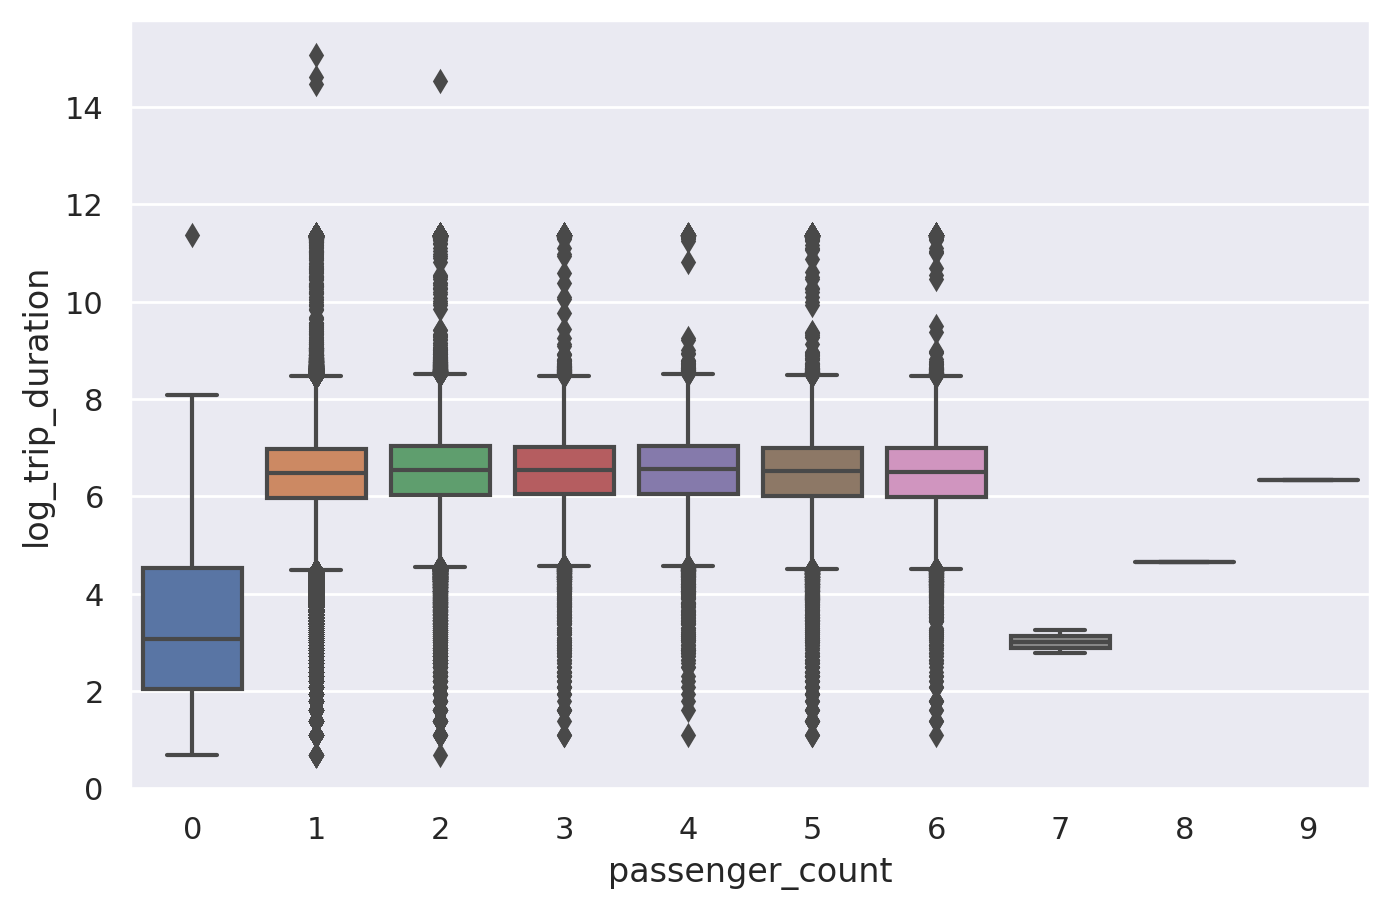

In [ ]:
sns.boxplot(data=data, x='passenger_count', y='log_trip_duration')

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

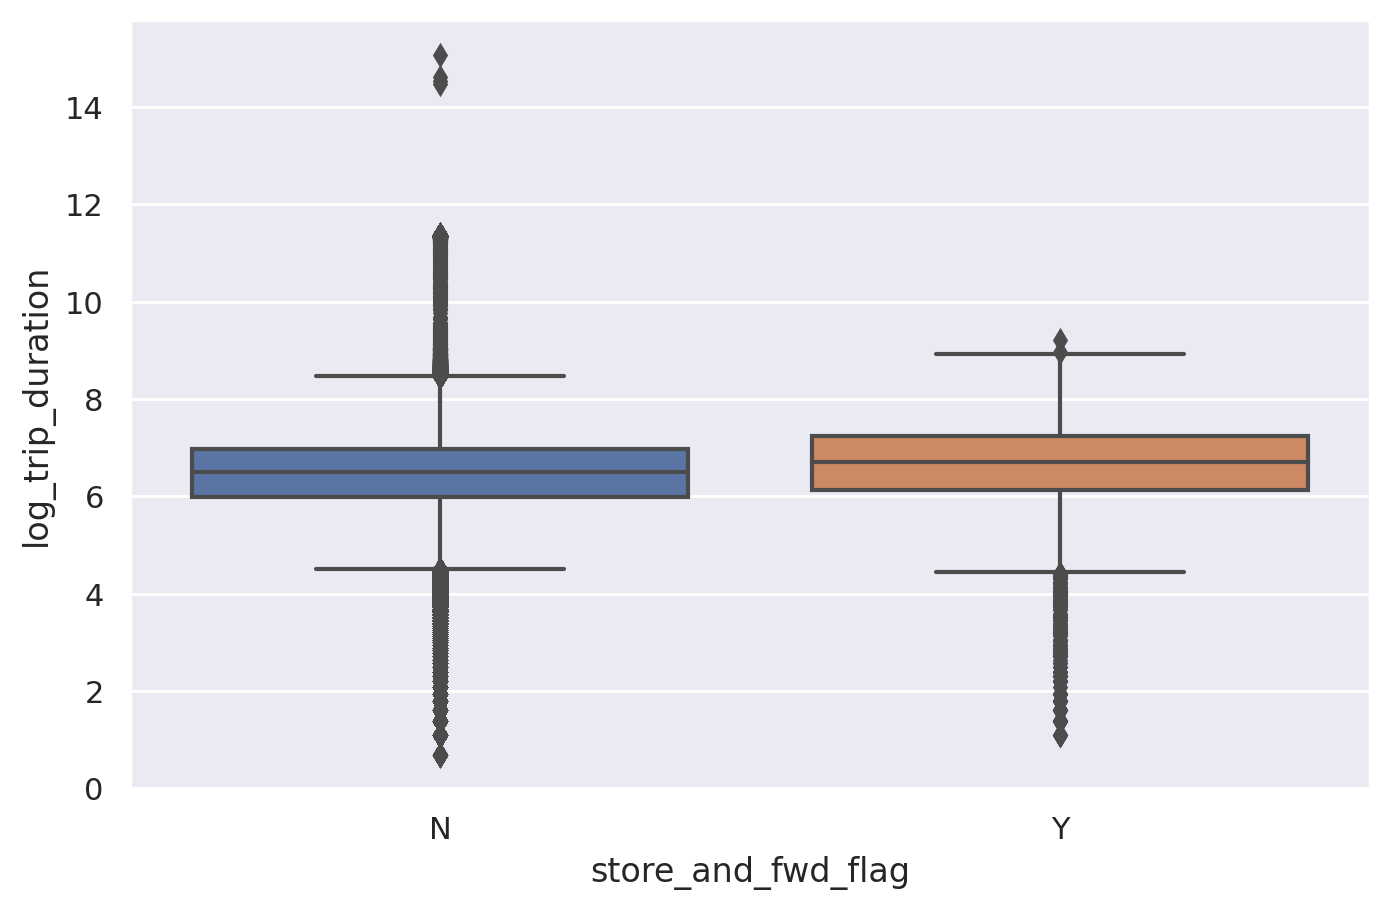

In [ ]:
sns.boxplot(data=data, x='store_and_fwd_flag', y='log_trip_duration')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [26]:
data.vendor_id -= 1
data.loc[(data.store_and_fwd_flag == 'Y'), 'store_and_fwd_flag'] = 1
data.loc[(data.store_and_fwd_flag == 'N'), 'store_and_fwd_flag'] = 0
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  ...  \
0               40.765602                  0           6.122493  ...   
1               40.731152                  0           6.498282  ...   
2               40.710087                  0           7.661527  ...   
3               40.706718                  0           6.063785  ...   
4               40.782520                  0           6.077642  ...   
...                   ...                ...                ...  ...   
1458639         40.740170                  0           6.658011  ...   
1458640         40.796547                  0           6.486161  ...   
1458641         40.707371                  0           6.639876  ...   
1458642         40.757107                  0           5.924256  ...   
1458643         40.790585                  0           5.293305  ...   

        haversine  log_haversine  is_worst_time  is_best_time  started_in_jfk  \
0        1.498523       0.915700              1             0               0   
1        1.805510       1.031585              0             0               0   
2        6.385107       1.999465              1             0               0   
3        1.485500       0.910474              0             0               0   
4        1.188590       0.783258              0             0               0   
...           ...            ...            ...           ...             ...   
1458639  1.225082       0.799794              1             0               0   
1458640  6.049844       1.953005              0             1               0   
1458641  7.824617       2.177545              0             1               0   
1458642  1.092565       0.738391              1             0               0   
1458643  1.134044       0.758019              1             0               0   

         ended_in_jfk  started_in_lagur  ended_in_lagur  pickup_cell  \
0                   0                 0               0            6   
1                   0                 0               0            2   
2                   0                 0               0            6   
3                   0                 0               0            1   
4                   0                 0               0           11   
...               ...               ...             ...          ...   
1458639             0                 0             

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Признаки не будут хорошими, так как распределение по категориям внутри этих признаков в основном не отличаются друг от друга, а значит не помогут улучшить модель

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [27]:
already01 = ['is_unusual', 'started_in_jfk','ended_in_jfk', 'started_in_lagur',
             'ended_in_lagur','is_worst_time', 'is_best_time']
categorical = ['weekday', 'hour', 'month','day_number',
               'pickup_cell', 'dropoff_cell']
numeric = ['log_haversine']
column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
 ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
model = pipeline.fit(X_train[categorical+numeric+already01], y_train)
y_test_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, y_test_pred))

Test RMSLE = 0.4834


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [28]:
data = data.drop(columns=['passenger_count', 'store_and_fwd_flag', 'vendor_id'])
categorical.pop()
already01.pop()
already01.pop()

'is_worst_time'

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<Axes: xlabel='log_haversine', ylabel='Count'>

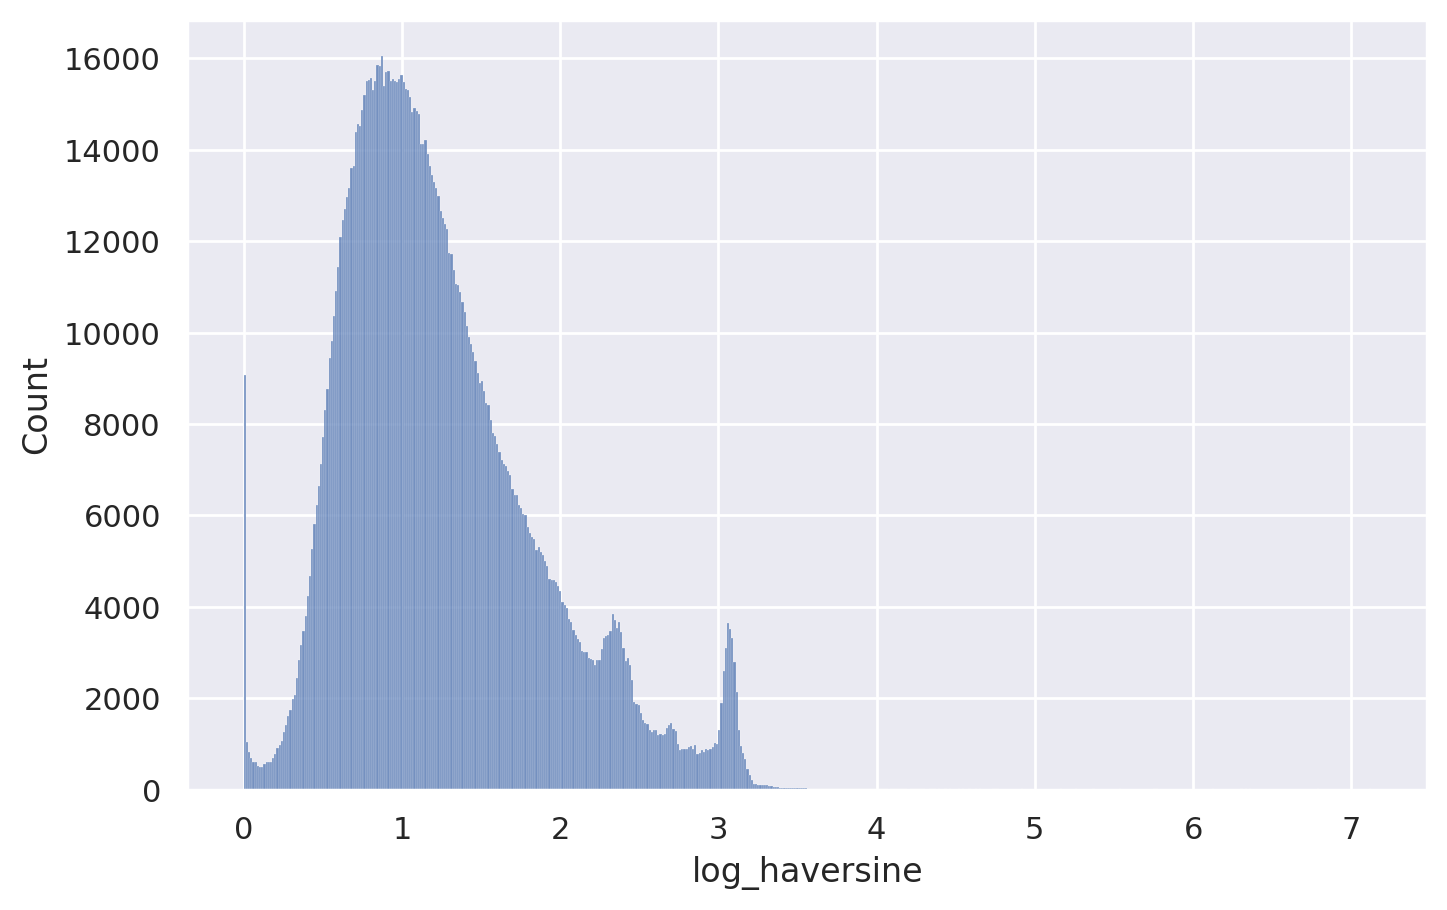

In [ ]:
sns.histplot(data=data, x='log_haversine')

<Axes: xlabel='log_trip_duration', ylabel='Count'>

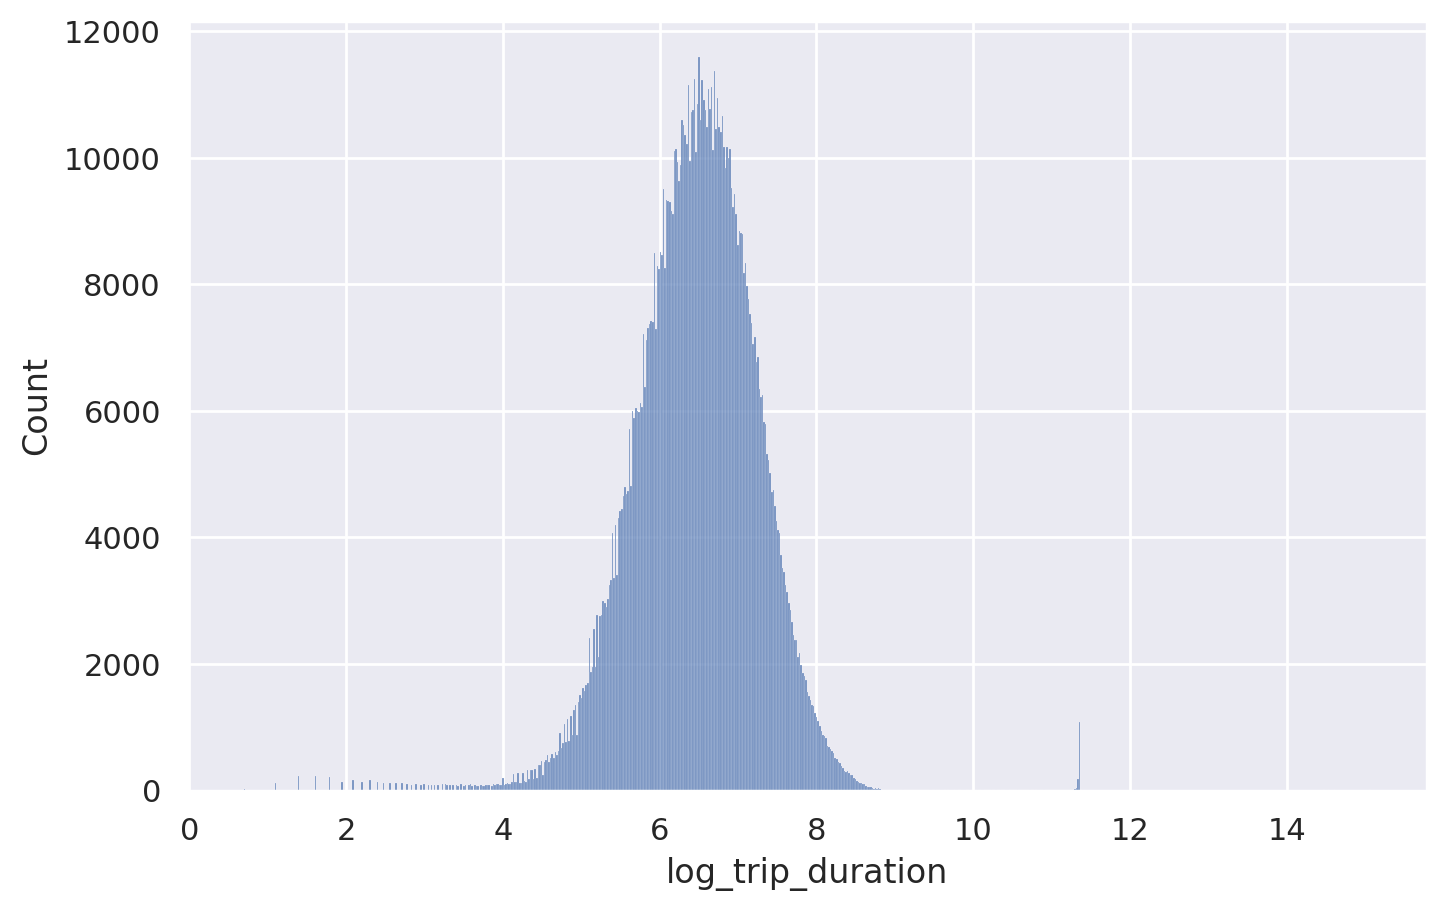

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

sns.histplot(data=y_train)

In [29]:
X_train['y_train'] = y_train
model = pipeline.fit(X_train[categorical+numeric], y_train)
y_train_pred = model.predict(X_train[categorical+numeric])
X_train['y_train_pred'] = y_train_pred
X_train['delta'] = X_train.y_train - X_train.y_train_pred

<Axes: xlabel='log_trip_duration', ylabel='Count'>

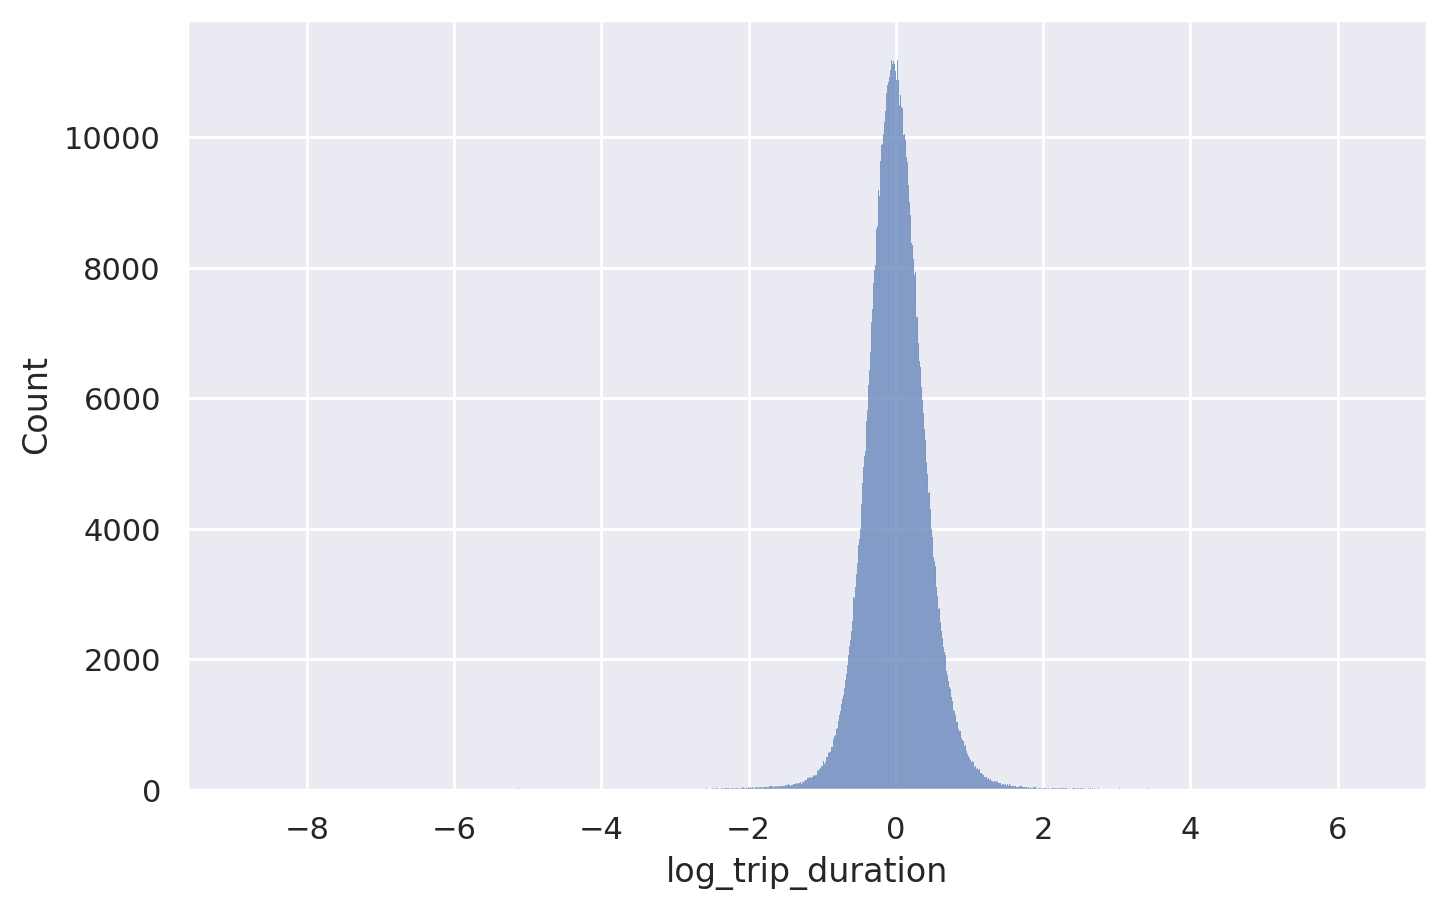

In [ ]:
sns.histplot(data=y_train_pred - y_train)

In [30]:
X_train = X_train[X_train.log_trip_duration > 3.5]
X_train = X_train[X_train.log_haversine < 3.5]
X_train = X_train[np.abs(X_train.delta) < 2.0]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [31]:
X_train['from_or_to_airport'] = X_train['started_in_jfk'] | X_train['ended_in_jfk'] | X_train['started_in_lagur'] | X_train['ended_in_lagur']

In [32]:
X_test['from_or_to_airport'] = X_test['started_in_jfk'] | X_test['ended_in_jfk'] | X_test['started_in_lagur'] | X_test['ended_in_lagur']

In [33]:
y_train = X_train.y_train
X_train = X_train.drop(columns=['y_train', 'y_train_pred', 'delta', 'started_in_jfk', 'ended_in_jfk', 'started_in_lagur', 'ended_in_lagur'])

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [34]:
already01 = ['is_unusual', 'from_or_to_airport','is_worst_time', 'is_best_time']
categorical = ['weekday', 'hour', 'month','day_number',
               'pickup_cell', 'dropoff_cell']
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge())])

model = pipeline.fit(X_train[categorical+numeric+already01], y_train)
y_test_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, y_test_pred))

Test RMSLE = 0.4837


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [50]:
print('Before one-hot-encoding features count:', len(already01) + len(categorical) + len(numeric))
res = 0
for category in categorical:
  res += X_train[category].nunique()
print('After one-hot-encoding features count:', res)

Before one-hot-encoding features count: 11
After one-hot-encoding features count: 244


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [35]:
from sklearn.linear_model import Lasso
pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Lasso())])

model = pipeline.fit(X_train[categorical+numeric+already01], y_train)
y_test_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, y_test_pred))

Test RMSLE = 0.7950


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [36]:
train, validate, train_y, validate_y = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [38]:
alphas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

best_lasso_alpha = 0
best_ridge_alpha = 0
best_lasso_res = 10
best_ridge_res = 10

for alpha in alphas:
  pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Lasso(alpha=alpha))])
  model = pipeline.fit(train[categorical+numeric+already01], train_y)
  validate_y_pred = model.predict(validate[categorical+numeric+already01])
  cur_res = rmsle(validate_y, validate_y_pred)
  if  cur_res < best_lasso_res:
    best_lasso_res = cur_res
    best_lasso_alpha = alpha

  print('Lasso', alpha, cur_res)

Lasso 0.001 0.4152693407579001
Lasso 0.01 0.44630165127349714
Lasso 0.1 0.46818408733725114
Lasso 1 0.7363793251913104
Lasso 10.0 0.7363793251913104
Lasso 100.0 0.7363793251913104
Lasso 1000.0 0.7363793251913104


In [39]:
for alpha in alphas:
  pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge(alpha=alpha))])
  model = pipeline.fit(train[categorical+numeric+already01], train_y)
  validate_y_pred = model.predict(validate[categorical+numeric+already01])
  cur_res = rmsle(validate_y, validate_y_pred)
  if  cur_res < best_ridge_res:
    best_ridge_res = cur_res
    best_ridge_alpha = alpha

  print('Ridge', alpha, cur_res)

Ridge 0.001 0.4112393378840051
Ridge 0.01 0.4112392991072487
Ridge 0.1 0.4112393377881751
Ridge 1 0.4112393050191203
Ridge 10.0 0.4112389273277143
Ridge 100.0 0.4112383283744353
Ridge 1000.0 0.411414013869479


In [41]:
pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Lasso(alpha=best_lasso_alpha))])
model = pipeline.fit(train[categorical+numeric+already01], train_y)
test_y_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, test_y_pred))

Test RMSLE = 0.4873


In [43]:
pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge(alpha=best_ridge_alpha))])
model = pipeline.fit(train[categorical+numeric+already01], train_y)
test_y_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, test_y_pred))

Test RMSLE = 0.4837


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [45]:
zero_weights = []
for alpha in alphas:
  pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Lasso(alpha=alpha))])
  model = pipeline.fit(train[categorical+numeric+already01], train_y)
  validate_y_pred = model.predict(validate[categorical+numeric+already01])
  zero_weights.append(np.sum(pipeline.named_steps['regression'].coef_ == 0))

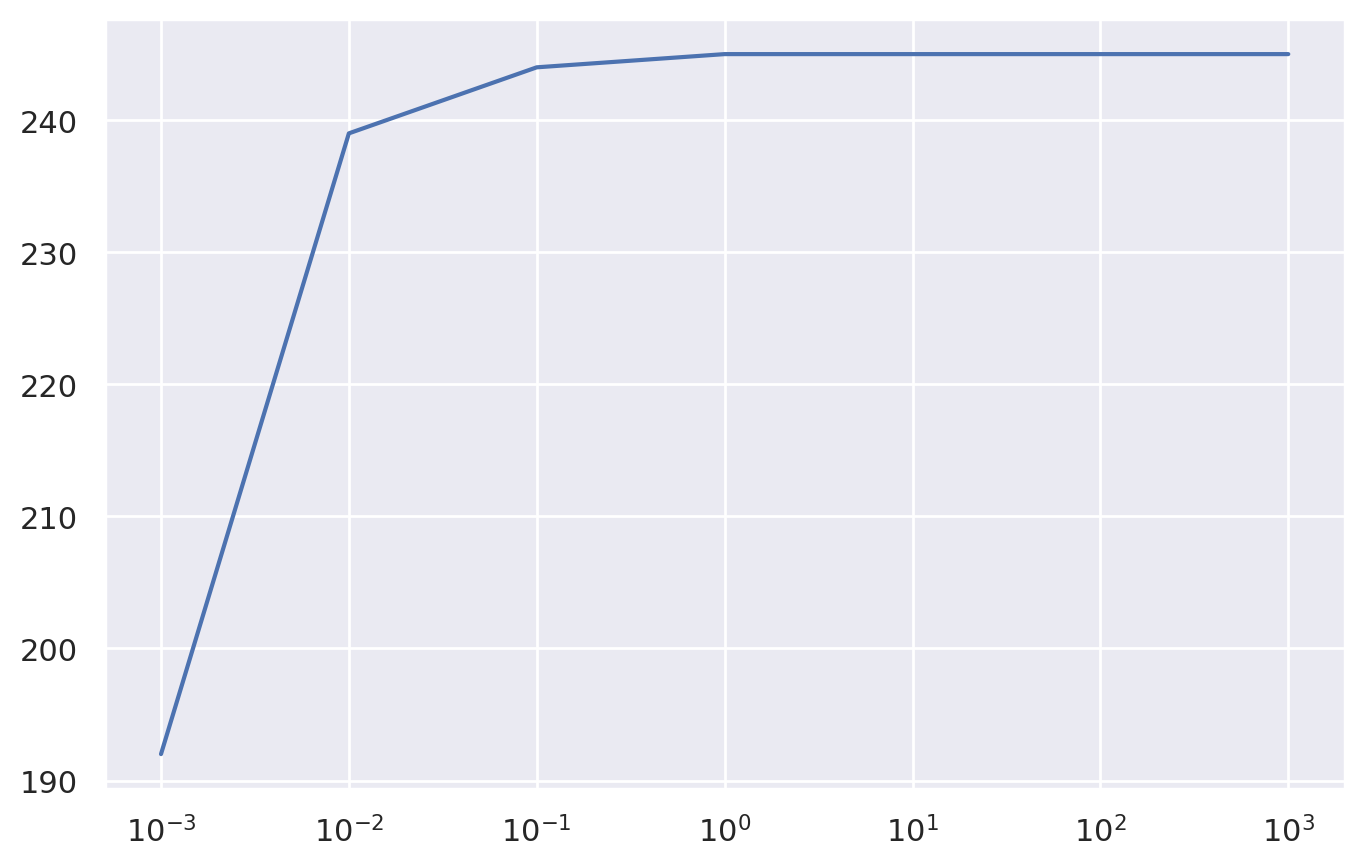

In [47]:
plt.plot(alphas, zero_weights)
plt.xscale("log")
plt.show()

Оптимальный вес подобранный нами и так подходит под условие зануление половины весов. Так что качеством жертвовать не придётся

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Признак потенциально очень полезный, потому что у маршрута могут быть особенности, например, мост, туннель или еще что-то, что влияет на поездку. Модель не может вытащить эту информацию, так как наша модель линейная и не может пересекать признаки

In [80]:

sorted_cells = X_train[(X_train.pickup_cell >= 0) & (X_train.dropoff_cell >= 0)].groupby(by=['pickup_cell', 'dropoff_cell']).agg(trip_cnt=('id', 'count')).reset_index().sort_values(by='trip_cnt', ascending=False).head(100).reset_index(drop=True)

def calculate_popular_trip(row):
  if (row.pickup_cell, row.dropoff_cell) in popular_trips:
    return popular_trips[(row.pickup_cell, row.dropoff_cell)]
  else:
    return -1

popular_trips = dict()
for i in range(100):
  popular_trips[(sorted_cells.iloc[i].pickup_cell, sorted_cells.iloc[i].dropoff_cell)] = i

X_train['popular_trip'] = X_train.apply(calculate_popular_trip, axis=1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [85]:
X_test['popular_trip'] = X_test.apply(calculate_popular_trip, axis=1)

In [86]:
already01 = ['is_unusual', 'from_or_to_airport','is_worst_time', 'is_best_time']
categorical = ['weekday', 'hour', 'month','day_number',
               'pickup_cell', 'dropoff_cell']
numeric = ['log_haversine', 'popular_trip']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline([('ohe_scaling', column_transformer), ('regression', Ridge(alpha=best_ridge_alpha))])
model = pipeline.fit(X_train[categorical+numeric+already01], y_train)
test_y_pred = model.predict(X_test[categorical+numeric+already01])
print("Test RMSLE = %.4f" % rmsle(y_test, test_y_pred))

Test RMSLE = 0.4831


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.